In [1]:
import os
import zipfile
import pickle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cv2
import tensorflow as tf

In [2]:
# change the name with the current directory
current_dir = "cat_dog_classification"
with zipfile.ZipFile(f"../{current_dir}/train.zip","r") as z:
    z.extractall(".")
    
with zipfile.ZipFile(f"../{current_dir}/test1.zip","r") as z:
    z.extractall(".")

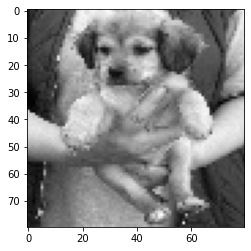

In [3]:
main_dir = os.getcwd()
train_dir = "train/"
path = os.path.join(main_dir,train_dir)

for p in os.listdir(path):
    category = p.split(".")[0]
    img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
    new_img_array = cv2.resize(img_array, dsize=(80, 80))
    plt.imshow(new_img_array,cmap="gray")
    break

In [4]:
X = []
y = []
convert = lambda category: int(category == 'dog')

def create_test_data(path):
    for p in os.listdir(path):
        category = p.split(".")[0]
        category = convert(category)
        
        img_array = cv2.imread(os.path.join(path,p), cv2.IMREAD_GRAYSCALE)
        new_img_array = cv2.resize(img_array, dsize=(80, 80))
        
        X.append(new_img_array)
        y.append(category)

In [5]:
create_test_data(path)

In [6]:
X = np.array(X).reshape(-1, 80, 80, 1)
y = np.array(y)

In [7]:
X.shape, y.shape

((25000, 80, 80, 1), (25000,))

In [8]:
pickle.dump(X, open('pickle_data/train_x.pkl', 'wb'))
pickle.dump(y, open('pickle_data/train_y.pkl', 'wb'))

In [9]:
X = pickle.load(open('pickle_data/train_x.pkl', 'rb'))
y = pickle.load(open('pickle_data/train_y.pkl', 'rb'))

In [10]:
X.shape, y.shape

((25000, 80, 80, 1), (25000,))

In [11]:
#Normalize data
X = X/255.0

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=X.shape[1:]),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

Metal device set to: Apple M1


2022-04-06 16:56:30.859728: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-06 16:56:30.859806: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [13]:
history = model.fit(X, y, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10


2022-04-06 16:56:31.645729: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-04-06 16:56:31.970333: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


625/625 [==============================] - ETA: 0s - loss: 0.6104 - accuracy: 0.6600

2022-04-06 16:56:56.858630: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


625/625 [==============================] - 27s 42ms/step - loss: 0.6104 - accuracy: 0.6600 - val_loss: 0.6016 - val_accuracy: 0.6784
Epoch 2/10
625/625 [==============================] - 25s 41ms/step - loss: 0.5347 - accuracy: 0.7316 - val_loss: 0.5309 - val_accuracy: 0.7444
Epoch 3/10
625/625 [==============================] - 25s 40ms/step - loss: 0.4844 - accuracy: 0.7674 - val_loss: 0.5106 - val_accuracy: 0.7420
Epoch 4/10
625/625 [==============================] - 25s 41ms/step - loss: 0.4434 - accuracy: 0.7936 - val_loss: 0.4754 - val_accuracy: 0.7690
Epoch 5/10
625/625 [==============================] - 26s 41ms/step - loss: 0.3980 - accuracy: 0.8168 - val_loss: 0.4954 - val_accuracy: 0.7646
Epoch 6/10
625/625 [==============================] - 26s 41ms/step - loss: 0.3543 - accuracy: 0.8409 - val_loss: 0.4765 - val_accuracy: 0.7808
Epoch 7/10
625/625 [==============================] - 26s 41ms/step - loss: 0.2911 - accuracy: 0.8735 - val_loss: 0.5203 - val_accuracy: 0.7774
Epo

<AxesSubplot:>

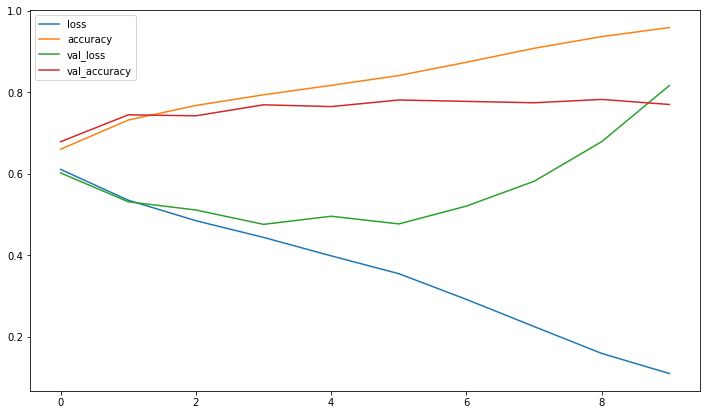

In [14]:
pd.DataFrame(history.history).plot(figsize=(12, 7))

In [15]:
test_dir = "test1"
path = os.path.join(main_dir,test_dir)

X_test = []
id_line = []
def create_test1_data(path):
    for p in os.listdir(path):
        id_line.append(p.split(".")[0])
        img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
        new_img_array = cv2.resize(img_array, dsize=(80, 80))
        X_test.append(new_img_array)
create_test1_data(path)
X_test = np.array(X_test).reshape(-1,80,80,1)
X_test = X_test/255

In [16]:
predictions = model.predict(X_test)

2022-04-06 17:00:57.241915: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [17]:
predicted_val = [int(round(p[0])) for p in predictions]

In [18]:
len(predicted_val)

12500